<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:22px;font-style:sans-serif;">Analyzing Credit Default</span> 

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;"> Content</span>

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

1. [Introduction](#Introduction:)
2. [Import libraries](#Import-libraries)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory data analysis](#4.-Exploratory-data-analysis)
5. [Cross validation](#Cross-validation)
6. [Model implementation](#Model-implementation)
    - RandomForestClassifier
    - GradientBoostingClassifier
    - XGBClassifier
    - CatBoostClassifier
    - LGBMClassifier
7. [Evaluation](#Evaluation)

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Introduction:</span> 

Analyzing credit default is an important task for financial institutions and lenders to assess the creditworthiness of their customers. Credit default occurs when a borrower fails to make payments on their debts or loans, which can lead to significant financial losses for the lender.

To analyze credit default, financial institutions and lenders typically use statistical and machine learning models to predict the likelihood of a borrower defaulting on their payments. These models may incorporate a range of variables, such as credit scores, income levels, employment history, and other financial and demographic factors.

Jupyter Notebook is an excellent tool for analyzing credit default, as it provides a flexible and interactive environment for data analysis and model building. Using Python and various data analysis libraries, such as pandas and scikit-learn, analysts can preprocess and analyze large datasets, build predictive models, and visualize the results.

Through careful analysis and modeling, financial institutions and lenders can better assess the credit risk of their customers and make more informed lending decisions. This can help reduce the risk of credit default and improve the overall financial health of the institution.

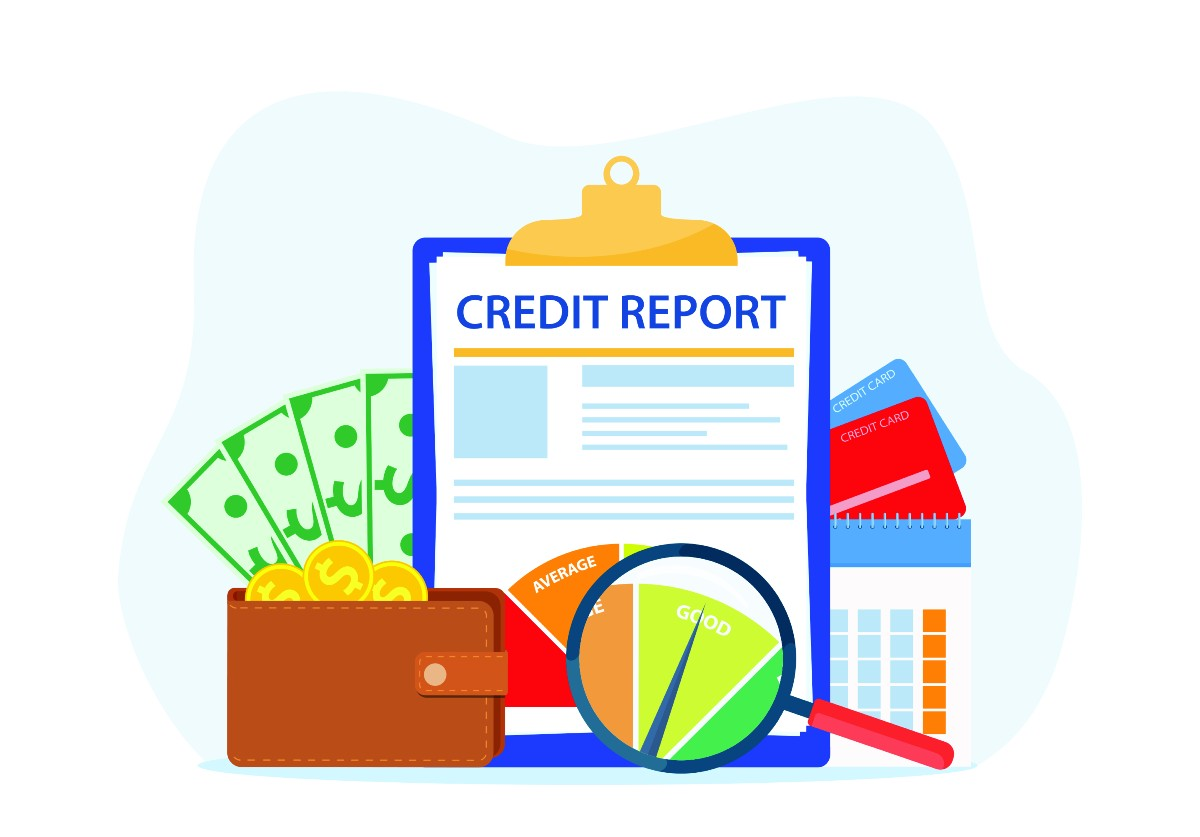

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">Dataset has following attributes:</span> 


* person_age: Age
* person_income: Annual Income
* person_home_ownership: Home ownership
* person_emp_length: Employment length (in years)
* loan_intent: Loan intent
* loan_grade: Loan grade
* loan_amnt: Loan amount
* loan_int_rate: Interest rate
* loan_percent_income: Percent income
* cb_person_default_on_file: Historical default
* cb_preson_cred_hist_length: Credit history length
* **loan_status: Loan status (0 is non default 1 is default)**

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Import libraries</span>

In [83]:
# for numerical computing with Python
import numpy as np
# for data manipulation and analysis
import pandas as pd 

# for data visualization
import matplotlib.pyplot as plt 
# for advanced data visualization
import seaborn as sns 

# for machine learning in Python
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
# for building a random forest classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# for building an XGBoost classifier
from xgboost import XGBClassifier 
# for building a CatBoost classifier
from catboost import CatBoostClassifier
# light boosting model
import lightgbm as lgb

# for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, recall_score

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Data Preprocessing</span>

Data source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [45]:
# Load the credit risk dataset into a pandas DataFrame
data = pd.read_csv('credit_risk_dataset.csv')

# Print the first few rows of the DataFrame to ensure the data loaded correctly
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [46]:
# Shape of data
data.shape

(32581, 12)

In [47]:
# Numeric description about numeric columns
data.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


* **Dataset contains outliers'**

In [48]:
# Numeric description about categorical columns
data.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [49]:
# This code prints a summary of the DataFrame "df".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


* **Dataset contains NaN values**

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Exploratory data analysis</span>

#### Filling NaN values and drop duplicates

In [50]:
round((data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False), 2)

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [51]:
# Filling missed values with median of columns
data.fillna({'loan_int_rate' : data.loan_int_rate.quantile(0.5),
             'person_emp_length' : data.person_emp_length.quantile(0.5)}, inplace = True)

In [52]:
# NaN values status
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [53]:
# Check the number of duplicated rows in the dataset
data.duplicated().sum()

165

In [54]:
# Remove duplicated rows from the dataset in place
data.drop_duplicates(inplace=True)

#### Drop Outliers

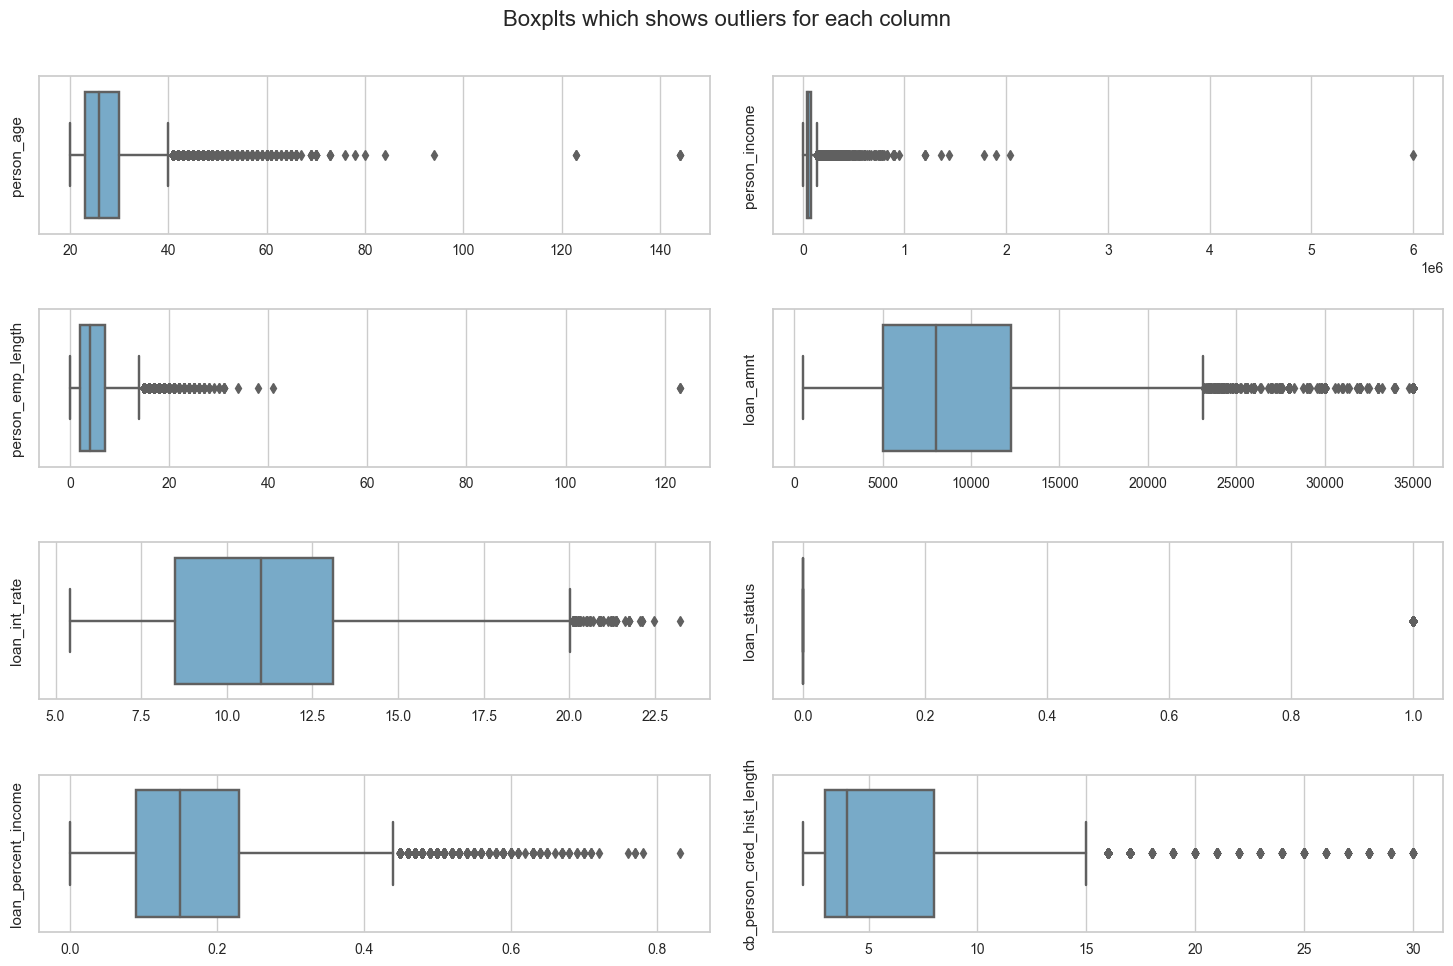

In [55]:
num_cols_ind = [data[i].dtype != 'object' for i in data.columns]
num_cols = list(data.columns[num_cols_ind])

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
for idx, column in enumerate(num_cols):
    ax = axes[int(idx / 2), idx % 2]
    sns.boxplot(data=data, x= data[column], ax=ax, palette='Blues')
    ax.set_xlabel("")
    ax.set_ylabel(column)
    for container in ax.containers:
        ax.bar_label(container)

fig.suptitle("Boxplts which shows outliers for each column", fontsize=16)

# Adjust the spacing between the plots
fig.tight_layout(pad = 2)

# Show the plot
plt.show()

* **Here is i try to drop 0.5 % of outliers for each numeric column but it's not correct way, I should analize individualy each column and drop outliers**

In [56]:
# Define a function that Return a new dataframe with values below the 99.5th percentile
def outliers(data, column):
    outlier = data[column].quantile(0.995)
    return data[data[column] < outlier]

# Use the 'outliers' function to remove values above the 99.5th percentile
for i in num_cols:
    if (i != 'loan_status') and (i != 'loan_int_rate'):
        data = outliers(data, i)

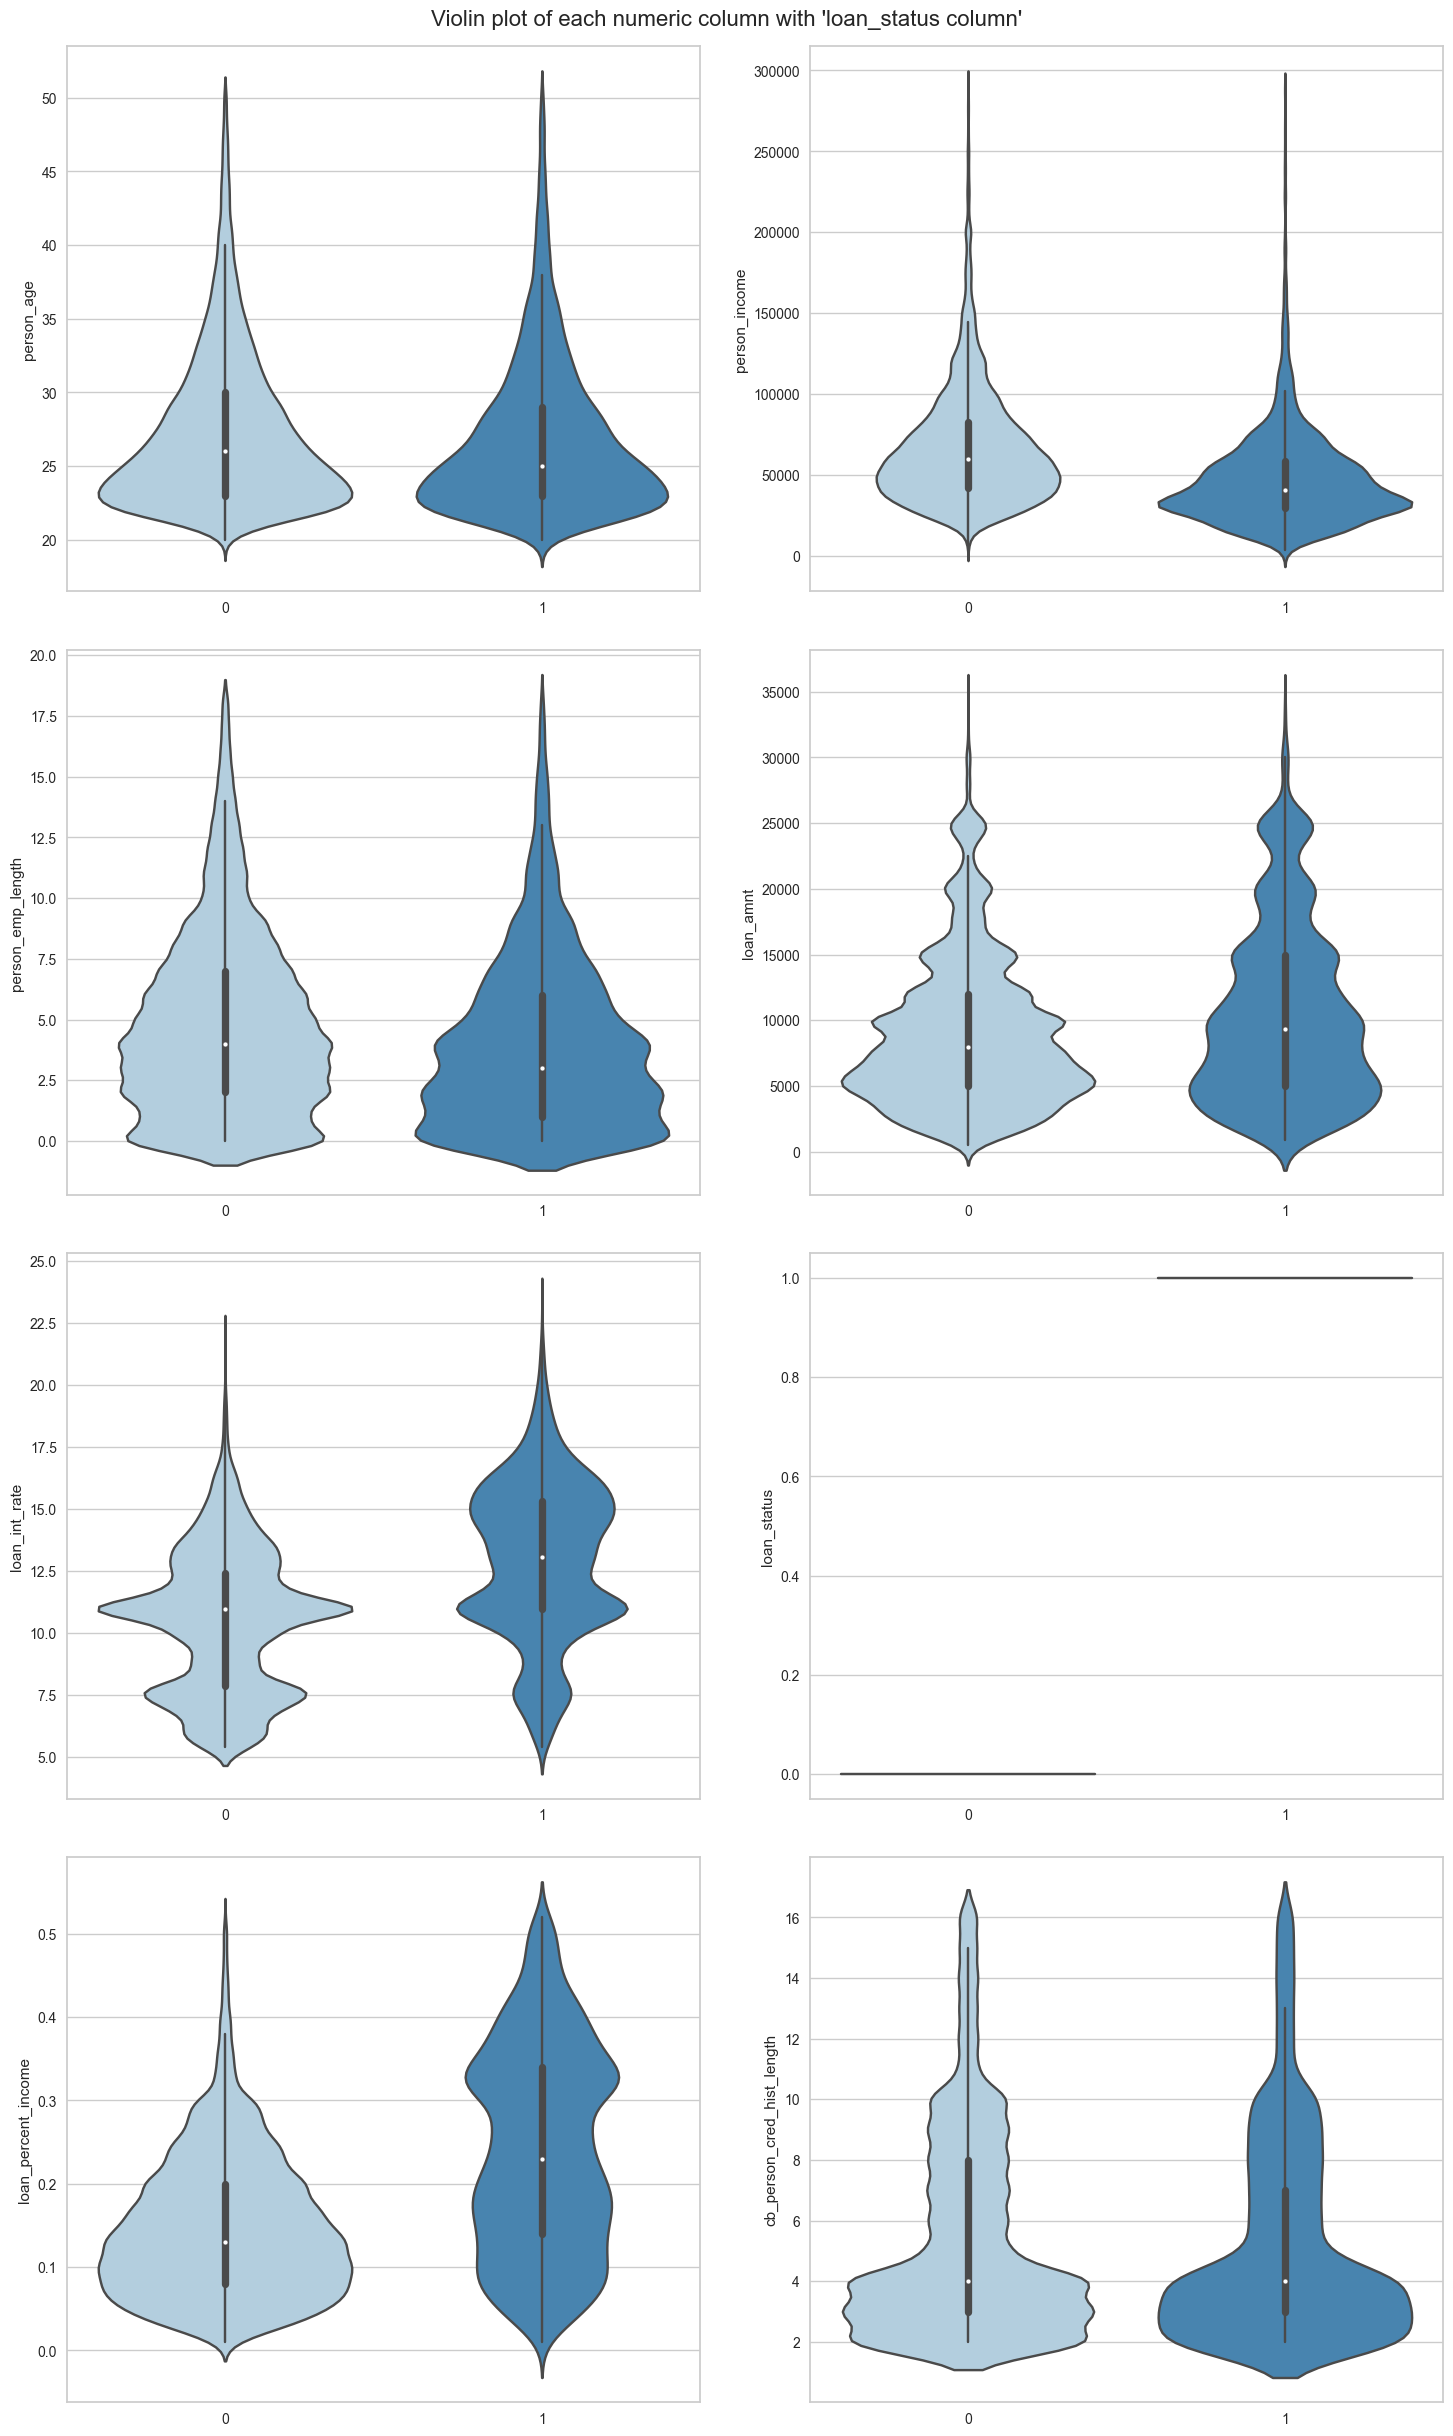

In [57]:
# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
for idx, column in enumerate(num_cols):
    ax = axes[int(idx / 2), idx % 2]
    sns.violinplot(dataset=data, x = data.loan_status, y= data[column], ax=ax, palette='Blues')
    ax.set_xlabel("")
    ax.set_ylabel(column)
    for container in ax.containers:
        ax.bar_label(container)

fig.suptitle("Violin plot of each numeric column with 'loan_status column'", fontsize=16)

# Adjust the spacing between the plots
fig.tight_layout(pad = 2)

# Show the plot
plt.show()

**Here are the views generated from this violinplots:**
* **Age Range:**

The data shows that the main age range of customers is between 20-40 years old. This age group comprises the largest proportion of customers who take out loans from the company. Therefore, the company should consider targeting marketing efforts towards this age group to attract more customers and improve customer acquisition.

* **Income Level:**

The data indicates that most default clients are those who earn less than $50,000. This finding suggests that the company should pay closer attention to this group of clients and perhaps consider more precise measures to assess their creditworthiness, such as conducting more rigorous background checks or requesting additional collateral.

* **Interest Rates:**

Loans with an interest rate above 12.5% are more likely to default. The company should consider adjusting its interest rates to reflect the risks associated with higher interest rates, and it should also assess its loan approval criteria to ensure that customers are not approved for loans they may struggle to repay.

* **Percentage of Salary Used for Credit Payments:**

The data shows that paying more than 30% of one's salary on credit seriously increases the likelihood of customer default. Therefore, the company should encourage its customers to keep their credit payments within this threshold. The company can also consider offering lower interest rates or longer repayment periods to clients who need to reduce their monthly credit payments.

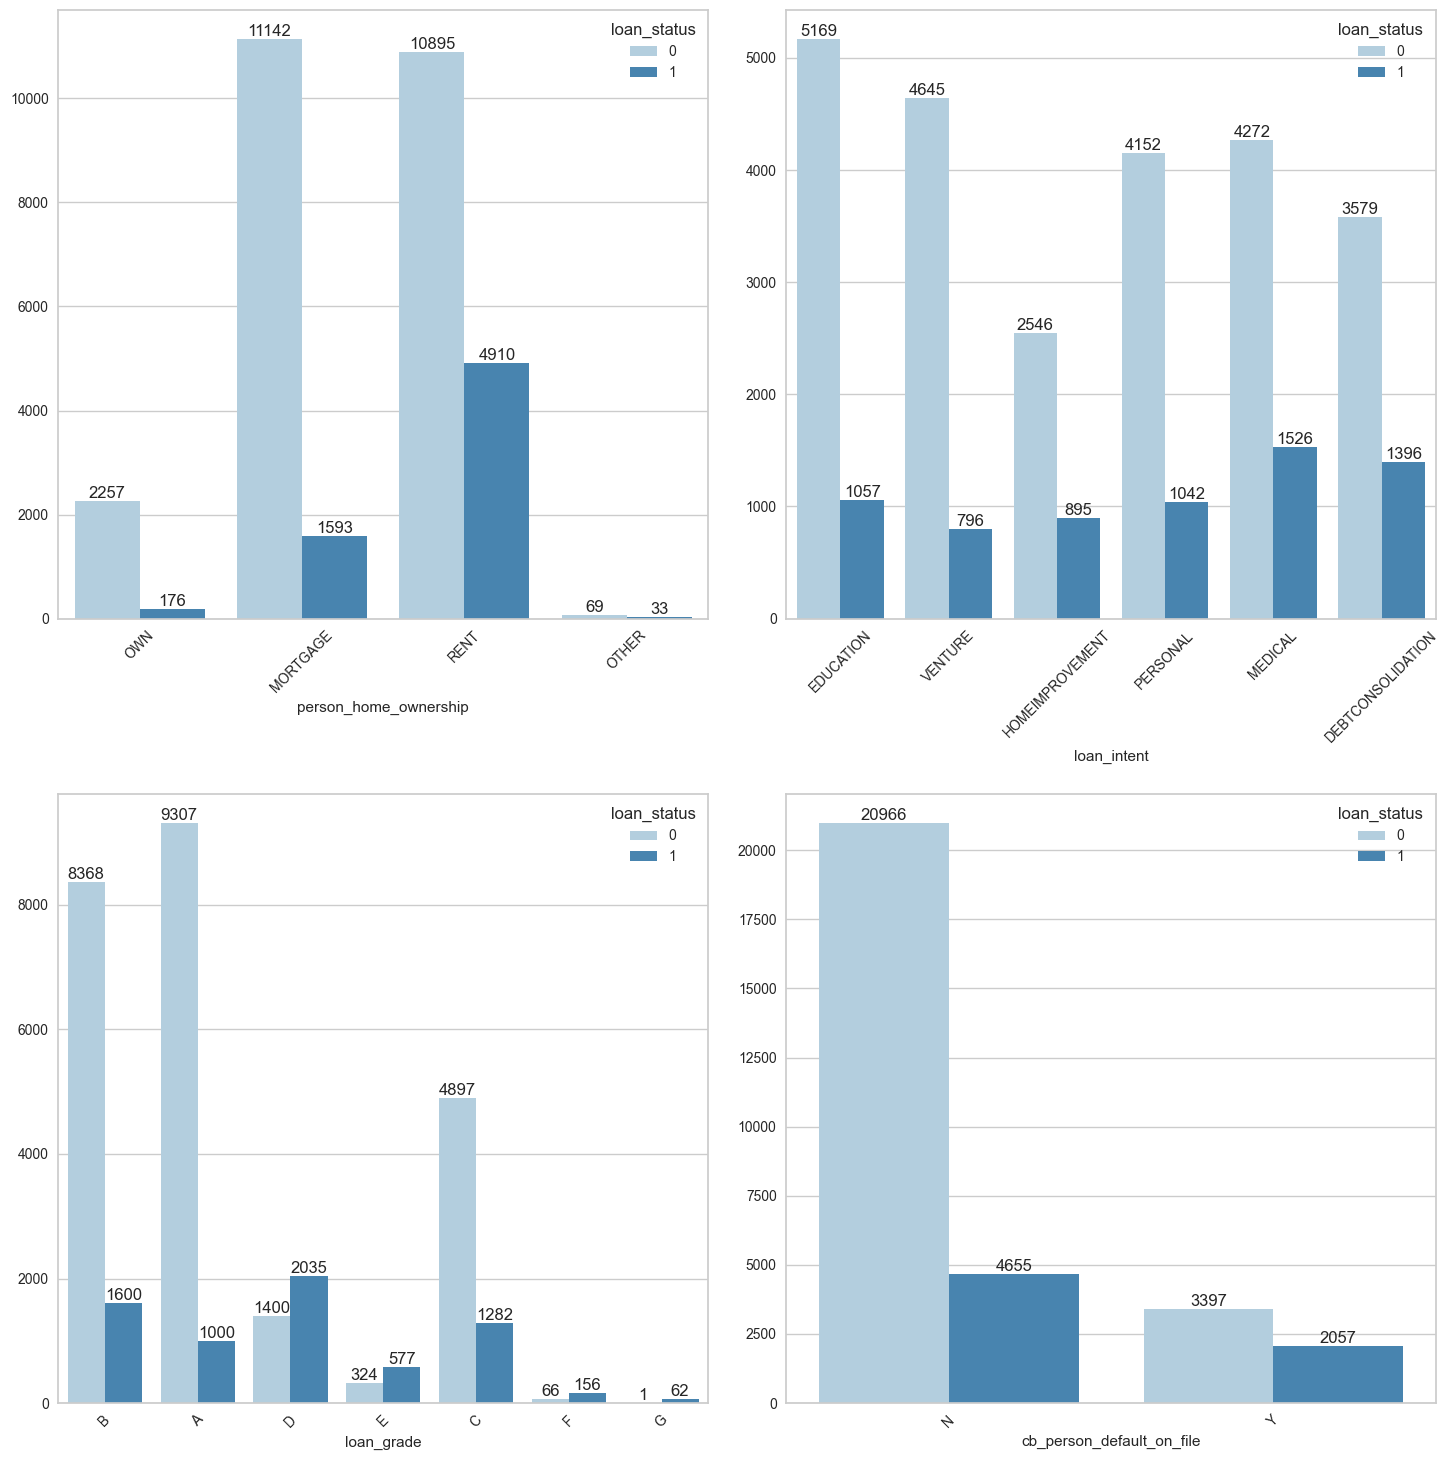

In [58]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for idx, column in enumerate(cat_cols):
    ax = axes[int(idx / 2), idx % 2]
    sns.countplot(x=column, data=data, ax=ax, palette = 'Blues', hue='loan_status');
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)
    for container in ax.containers:
        ax.bar_label(container)
        
# Adjust the spacing between the plots
fig.tight_layout(pad = 1.8)

**Here are the views generated from this plots:**

* **Homeownership Status:**

The data indicates that customers who own a house have a lower risk of default than those who are renting. Homeownership can be a good indicator of financial stability, as it demonstrates that the customer has the means to make regular mortgage payments and is invested in maintaining their property. Therefore, the company may want to consider offering more favorable loan terms to customers who own a house.

* **Credit History Ratings:**

The credit history rating is a crucial factor in determining the likelihood of default for customers. The data indicates that customers with a rating of A, B, or C have a lower risk of default compared to those with a rating of D or lower. The company should pay close attention to the credit history ratings of customers when evaluating loan applications. If a customer has a low credit rating, the company may want to consider additional collateral or a co-signer to reduce the risk of default.

In [59]:
# Map the letter grades in the 'loan_grade' column to numerical values
data['loan_grade'] = data['loan_grade'].map({'A' : 7, 'B' : 6, 'C' : 5,
                                             'D' : 4, 'E' : 3, 'F' : 2, 'G' : 1})

# Map person_home_ownership column to numerical values
data.person_home_ownership = data.person_home_ownership.map({
    'OWN' : 4,
    'MORTGAGE' : 3,
    'RENT' : 2,
    'OTHER' : 1})

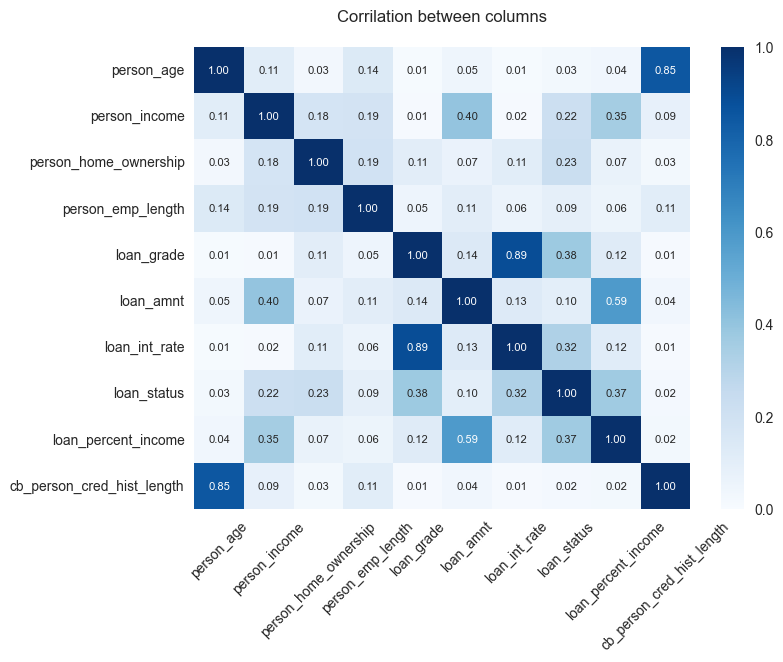

In [60]:
# Creates a heatmap of the absolute correlation values between each pair of columns in the DataFrame 'data'
plt.figure(figsize=(8,6))

sns.heatmap(data.corr().abs(), annot=True, vmin=0, vmax=1, cmap = 'Blues', fmt='.2f', annot_kws={'fontsize' : 8})
plt.title('Corrilation between columns\n', fontdict={'fontsize' : 12})
plt.xticks(rotation = 45)
plt.show()

* **The columns that mainly affect 'loan_status' are 'loan_grad', 'loan_percent_income', 'loan_int_rate', 'person_home_ownership' and 'person_income'. There is no strong influence in other columns.**

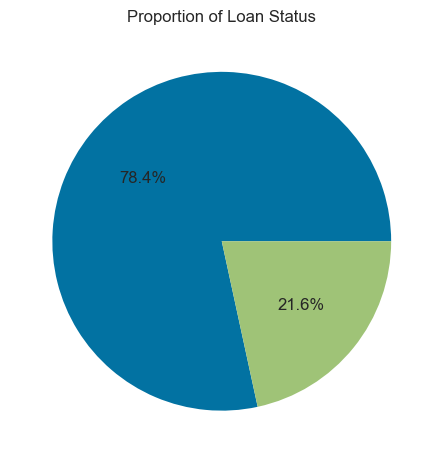

In [61]:
# Create a pie chart showing the proportion of each loan status in the dataset
plt.pie(data['loan_status'].value_counts(), autopct='%1.1f%%')
# Set the title of the chart
plt.title('Proportion of Loan Status')
# Show the chart
plt.show()

* **Here is unbalanced target but it should doesn't effect to final result.**

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Cross validation</span>

In [62]:
# Create dummy variables for the categorical features
data = pd.get_dummies(data)

In [63]:
X = data.drop('loan_status', axis = 1)
y = data.loan_status

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    stratify= y, 
                                                    random_state=73)

In [65]:
# Calculate the proportion of each class in the target variable
print(f'Distribution of target:\n{y.value_counts(normalize=True)}')

print('---------------------------')

# Calculate the proportion of each class in the training set target variable
print(f'Distribution of y_train:\n{y_train.value_counts(normalize=True)}')

Distribution of target:
0    0.784006
1    0.215994
Name: loan_status, dtype: float64
---------------------------
Distribution of y_train:
0    0.78399
1    0.21601
Name: loan_status, dtype: float64


<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Model implementation</span>

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">RandomForestClassifier</span>

In [66]:
rfc = RandomForestClassifier(random_state=73)

# define the parameter distribution to search
param_dist = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [5, 10, 20],
    "min_samples_split": [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2']
}

# create a randomized search object
random_search_rfc = RandomizedSearchCV(rfc, param_dist, cv=5, n_iter=10, random_state=73)

# fit the randomized search object to the data
random_search_rfc.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters:", random_search_rfc.best_params_)
print("Best score:", random_search_rfc.best_score_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best score: 0.9335076427996782


In [67]:
# Generate the classification report for the Random Forest Classifier model
pred_rfc = random_search_rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4873
           1       0.98      0.71      0.83      1342

    accuracy                           0.94      6215
   macro avg       0.95      0.86      0.89      6215
weighted avg       0.94      0.94      0.93      6215



In [68]:
def result_plot(y_test, y_pred): 
    # Define the false positive rate and true positive rate for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Define the AUC score for the ROC curve
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Create a 1x2 subplot
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    
    # Plot the confusion matrix heatmap in the first subplot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f', cbar = False, cmap="Blues", ax = ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('True')
    ax[0].set_title('Confusion Matrix', fontsize=12)
    
    # Plot the ROC curve in the second subplot
    ax[1].plot(fpr, tpr, color='orange', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='navy')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
    ax[1].legend()
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    plt.show()

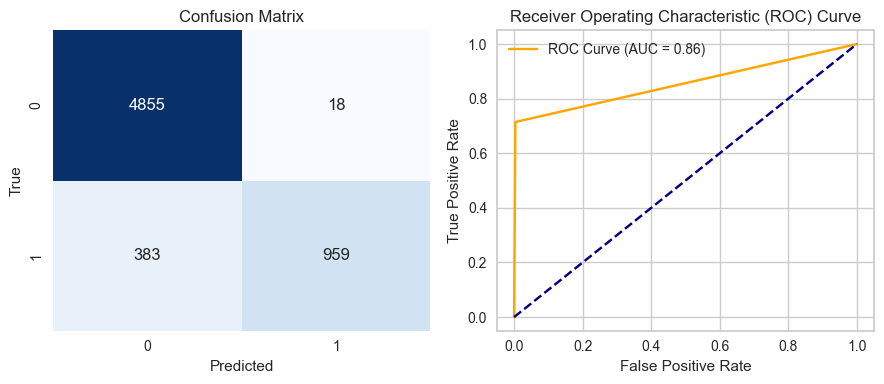

In [69]:
# Plot the confusion matrix heatmap and ROC for the Random Forest Classifier model
result_plot(y_test, pred_rfc)

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">XGBClassifier</span>

In [70]:
# Define the hyperparameter search space
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 500],
    'subsample': [0.5, 0.8, 1.0]
}

# Create an XGBoost classifier
xgb = XGBClassifier(random_state=73)

# Create a randomized search object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=80,
    scoring='accuracy',
    cv=5,
    random_state=73
)

# Fit the randomized search object to the data
random_search_xgb.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search_xgb.best_params_)
print("Best score:", random_search_xgb.best_score_)

Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1}
Best score: 0.9367658889782783


In [71]:
# Generate the classification report for the XGBoost Classifier model
pred_xgb = random_search_xgb.predict(X_test)
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4873
           1       0.97      0.72      0.83      1342

    accuracy                           0.94      6215
   macro avg       0.95      0.86      0.89      6215
weighted avg       0.94      0.94      0.93      6215



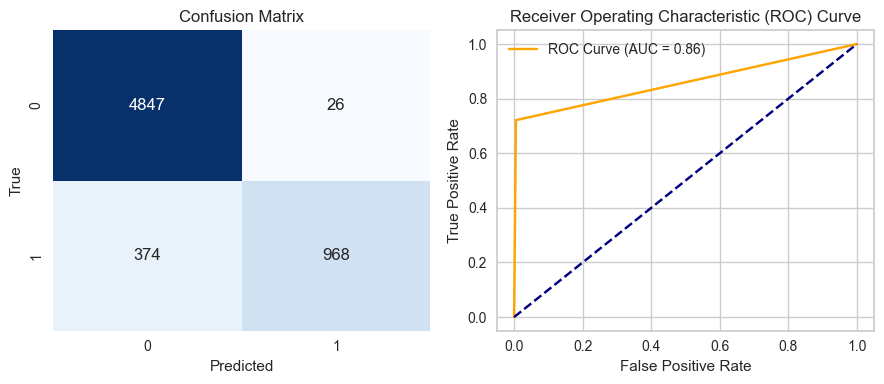

In [72]:
# Plot the confusion matrix heatmap and ROC for the XGBoost Classifier model
result_plot(y_test, pred_xgb)

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">CatBoostClassifier</span>

In [ ]:
# Define the CatBoost classifier
catboost = CatBoostClassifier()

# Define the hyperparameter space to search
param_dist = {
    'learning_rate': [0.1, 0.5, 0.9],
    'depth': [3, 6, 9],
    'l2_leaf_reg': [1, 5, 10],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'random_strength': [0.0, 0.5, 1.0]
}

# Define the RandomizedSearchCV object
random_search_cbc = RandomizedSearchCV(
    catboost, 
    param_distributions=param_dist, 
    n_iter=50,
    cv=5,
    random_state=73)

# Fit the RandomizedSearchCV object to the training data
random_search_cbc.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best Hyperparameters:", random_search_cbc.best_params_)
print("Best Score:", random_search_cbc.best_score_)

In [80]:
# Generate the classification report for the CatBoost Classifier model
pred_cbc = random_search_cbc.predict(X_test)
print(classification_report(y_test, pred_cbc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4873
           1       0.97      0.74      0.84      1342

    accuracy                           0.94      6215
   macro avg       0.95      0.86      0.90      6215
weighted avg       0.94      0.94      0.93      6215



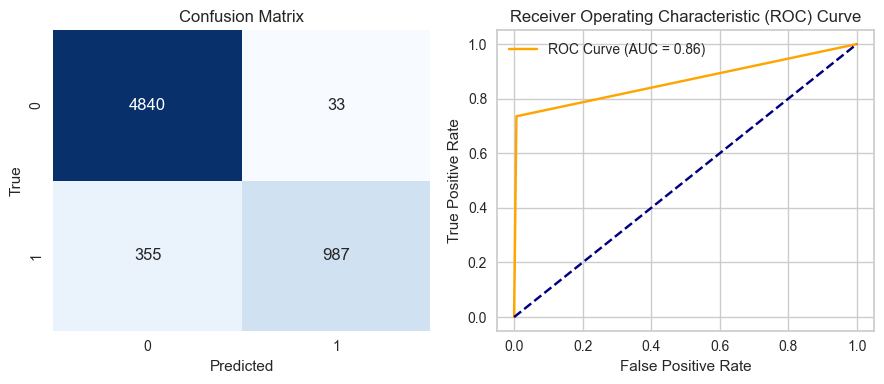

In [81]:
# Plot the confusion matrix heatmap and ROC for the CatBoostClassifier model
result_plot(y_test, pred_cbc)

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">GradientBoostingClassifier</span>

In [76]:
gbc = GradientBoostingClassifier()

# Define the hyperparameters and their respective ranges
param_dist = {'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5, 0.1],
              'min_samples_split': [2, 5, 10]}


random_search_gbc = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=50, cv=5, random_state=73)
random_search_gbc.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search_gbc.best_params_)

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}


In [77]:
# Generate the classification report for the GradientBoostingClassifier model
pred_gbc = random_search_gbc.predict(X_test)
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4873
           1       0.95      0.74      0.83      1342

    accuracy                           0.94      6215
   macro avg       0.94      0.86      0.90      6215
weighted avg       0.94      0.94      0.93      6215



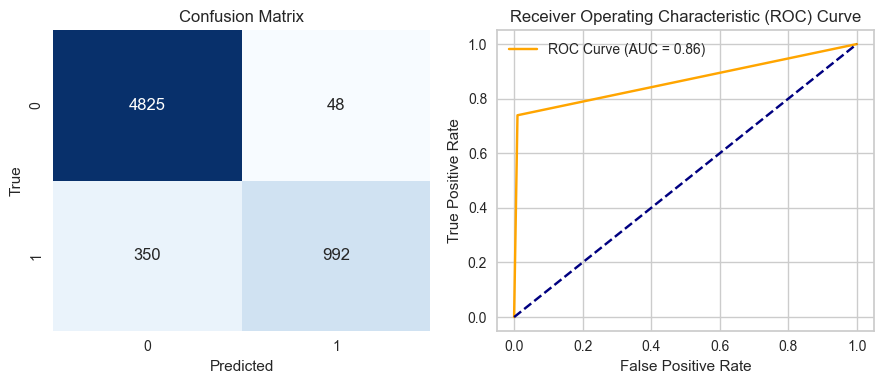

In [78]:
# Plot the confusion matrix heatmap and ROC for the GradientBoostingClassifier model
result_plot(y_test, pred_gbc)

<a id=section-two></a>
> <span style="color:#144272;font-weight:600;font-size:16px;font-style:sans-serif;">LGBMClassifier</span>

In [73]:
param_grid = {
    'num_leaves': np.arange(6, 50),
    'max_depth': np.arange(3, 12),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': np.arange(50, 300),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

lgboost = lgb.LGBMClassifier(random_state=73)

random_search_lgboost = RandomizedSearchCV(lgboost, param_distributions=param_grid, n_iter=100,
                                           cv=5, scoring='accuracy', random_state=73)
random_search_lgboost.fit(X_train, y_train)
print("Best hyperparameters:", random_search_lgboost.best_params_)

Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': 37, 'n_estimators': 147, 'max_depth': 11, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [74]:
# Generate the classification report for the LGBMClassifier model
pred_lgb = random_search_lgboost.predict(X_test)
print(classification_report(y_test, pred_lgb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4873
           1       0.98      0.73      0.83      1342

    accuracy                           0.94      6215
   macro avg       0.96      0.86      0.90      6215
weighted avg       0.94      0.94      0.93      6215



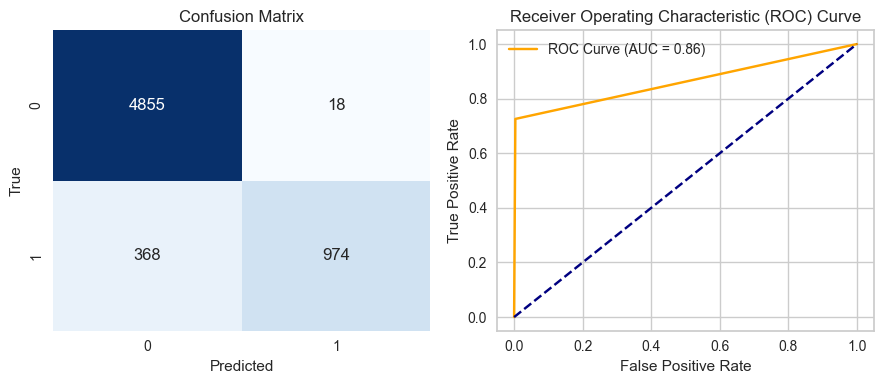

In [75]:
# Plot the confusion matrix heatmap and ROC for the LGBMClassifier model
result_plot(y_test, pred_lgb)

<a id=section-two></a>
# <span style="color:#144272;font-weight:600;font-size:18px;font-style:sans-serif;">Evaluation</span>

In [93]:
conclusion_df = pd.DataFrame(columns = ['train score', 'test score'])
conclusion_df['train score'] = [random_search_rfc.score(X_train, y_train).round(3),
                                  random_search_gbc.score(X_train, y_train).round(3),
                                  random_search_xgb.score(X_train, y_train).round(3),
                                  random_search_cbc.score(X_train, y_train).round(3),
                                  random_search_lgboost.score(X_train, y_train).round(3)]

conclusion_df['test score'] = [random_search_rfc.score(X_test, y_test),
                                 random_search_gbc.score(X_test, y_test),
                                 random_search_xgb.score(X_test, y_test),
                                 random_search_cbc.score(X_test, y_test),
                                 random_search_lgboost.score(X_test, y_test)]

conclusion_df['recall for testset'] = [recall_score(y_test, pred_rfc),
                           recall_score(y_test, pred_gbc),
                           recall_score(y_test, pred_xgb),
                           recall_score(y_test, pred_cbc),
                           recall_score(y_test, pred_lgb),]

conclusion_df.index = ['Random Forest Classifier',
                       'Gradient Boosting Classifier',
                       'XGB Classifier',
                       'CatBoost Classifier',
                       'LGBM Classifier']

conclusion_df.style.highlight_max(color = 'lightgreen', axis = 0)

,train score,test score,recall for testset
Random Forest Classifier,0.963000,0.935479,0.714605
Gradient Boosting Classifier,0.971000,0.935961,0.739195
XGB Classifier,0.942000,0.935640,0.721311
CatBoost Classifier,0.962000,0.937570,0.735469
LGBM Classifier,0.949000,0.937892,0.725782


* **Conclusion**

Based on the table, the Gradient Boosting Classifier and CatBoost Classifier appear to perform better in terms of recall on the test set, with recall scores of 0.739 and 0.735, respectively. However, it is important to note that the differences in recall scores between the classifiers are relatively small.

To increase recall, one potential strategy is to use a larger and more diverse dataset for training the model, which can help to reduce overfitting and improve generalization performance. Additionally, feature engineering can also be used to improve model performance.

In conclusion, while the Gradient Boosting Classifier and CatBoost Classifier appear to perform better than the other classifiers in terms of recall on the test set, further statistical analysis and regularization may be necessary to improve the models' performance and generalization abilities.